# Psychographic Segmentation of Gamers According to Gameplay Time, Sales, and Review Score

**Abstract**

In this project I initially sought to understand what makes a games successful by `Review Score`, `Sales`, `Genre`, and various measurements of `Gameplay Time`. As you will see, I found that depending on how you represent data, you find two completely opposing conclusions backed by equally convincing data. I found that `Review Score` and `Gameplay Time` both do and don't matter in the success of a game. I later determined that this was because of a [psychographic segmentation](https://www.surveymonkey.com/market-research/resources/what-is-psychographic-segmentation/#:~:text=Psychographic%20segmentation%20is%20the%20research,interests%2C%20opinions%2C%20and%20attitudes) among gamers. 

I found two player bases who behave oppositely: one player base buys games according to how they score on a rating scale. Consequently, these players buy a game solely based on reviews and, subsequently, the quality of its gameplay. The other player base cares less about reviews and gameplay quality. These players seem to favor games with multiplayer featurs and shorter gameplay time. We can even draw connections between how these differing behaviors cause them to gravitate toward different genres.

[**DataFrame**](https://corgis-edu.github.io/corgis/csv/video_games/) **Information**

The data provided by this dataframe was interesting to me. It represents the time required to beat certain video games from 2004 to 2010 in various playstyles. These playstyles include:

* **Completionist**: 100% game completion, including all game extensions and hidden quests, also known as Easter eggs. This metric is useful in determining the overall "size" of a game.
* **Main Story**: Involves only the content required to beat the core game, without any extensions or Easter eggs.
* **Main Story + Extra**: This section is slightly more vague, but it includes beating the main game and any major expansion packs, which are large downloadable content packs that often come after initial release.
* **All PlayStyles**: This section is kinda like an average of the other three. As such, All PlayStyles will be a more standardized measurement of gameplay time. It is more of a measurement of how much time people invest in the game, rather than how much time it takes someone to beat it. Therefore, this metric encompasses both casual players and more committed "professional" players. 

Other metrics include:
* **Review Score**: A typical review score for this game, out of 100.
* **Max Players**: The maximum number of players that can play this game.
* **Sales**: The total sales made on this game, measured in millions of dollars.

**Introduction**

While it's almost impossible to measure how "exciting" or "unique" a game is, through the given variables I will get a good idea of what makes a game successful. Here are a few questions I created to direct my approach in this video game analysis:

* How does the `Gameplay Time` of a game impact `Sales`? 
  * Do people: 

      (a) seek longer games to get more "bang for their buck"?
  
      (b) seek shorter games more focused on "replayability"? 

* How do `Review Score`, net `Sales`, and `Gameplay Time` differ by `Genre`?
    * Do certain `Genres` generally have longer games that appeal more to consumers?

**Imports, DataFrame Edits/Adjustments, and Genre Grouping**

My initial instinct was to sort the dataset by `Genre`, because like many things, videogames are most easily categorizable by genre. I noticed that many games were assigned to multiple genres, so I filtered out those that appeared the most and were less important, while isolating those that were more unique. 
I anticipate that many of the metrics will vary by genre, so it is conventional to sort by genre. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # np and plt just in case
df = pd.read_csv('/content/video_games.csv') #, index_col='Respondent'
  # https://corgis-edu.github.io/corgis/csv/video_games/

df = df[df["Length.All PlayStyles.Average"] != 0]
df = df[df["Metrics.Review Score"] != 0]
df = df[df["Metrics.Sales"] != 0]
  # Since these ^ are the three main vairables of this analysis, we remove rows with entries of 0 since it will mess up the results

df = df.drop_duplicates(subset=['Title'], keep='first') # I noticed a while later that titles were duplicated and really messed with my results
df.loc[834, 'Metadata.Genres'] = 'Role-Playing (RPG)' # I noticed that Grand Theft Auto was listed as Racing / Driving, so I switched it to RPG because it's more accurate

pd.set_option('display.max_columns', 35)
pd.set_option('display.max_rows', 100)
df["Metadata.Genres"] = df["Metadata.Genres"].apply(lambda x: x.replace("Action,", "").replace(",Action", "").replace("Action", "") if "Action," in x or ",Action" in x else x if x else "Action") # Action appears way to many times to be unique
df["Metadata.Genres"] = df["Metadata.Genres"].apply(lambda x: x.replace(x, "Racing / Driving") if "Racing / Driving" in x else x) # unique qualifier, specific sport
df["Metadata.Genres"] = df["Metadata.Genres"].apply(lambda x: x.replace(x, "Sports") if "Sports" in x else x) # unique qualifier (after racing)
df["Metadata.Genres"] = df["Metadata.Genres"].apply(lambda x: x.replace(x, "Role-Playing (RPG)") if "Role-Playing (RPG)" in x else x) # unique qualifier
df["Metadata.Genres"] = df["Metadata.Genres"].apply(lambda x: x.replace(x, "Strategy") if "Strategy" in x else x)
df["Metadata.Genres"] = df["Metadata.Genres"].apply(lambda x: x.replace("Simulation,", "").replace(",Simulation", "").replace("Simulation", "") if "Simulation," in x or ",Simulation" in x else x if x else "Simulation")

**Part 1: Identifying Trends in Gameplay Time and Sales**

For starters, lets make scatter plots with the three numerical variables:

*   `Gameplay Length`
*   `Sales`
*   `Review Score`

Since `Review Score` is already discretized, I think it would be affective to group by review score and find the mean values of `Gameplay Length` and `Sales` per each review score. 

**Figure 0**

Sales vs. Review Score will show us if games with better reviews make more sales. 

<Axes: title={'center': 'Sales vs. Review Score'}, xlabel='Review Score', ylabel='Sales'>

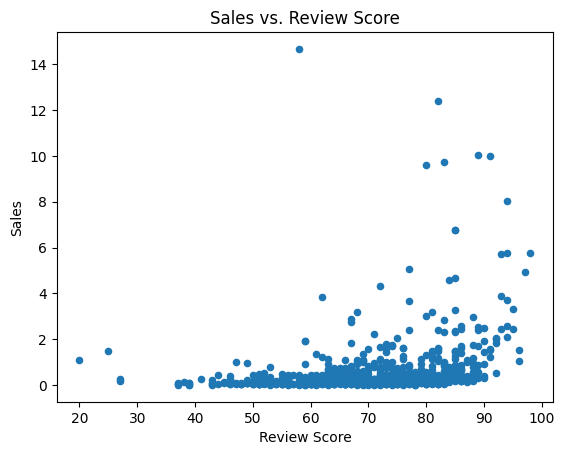

In [ ]:
df.plot.scatter(x='Metrics.Review Score', y='Metrics.Sales', xlabel='Review Score', ylabel='Sales', title='Sales vs. Review Score')

This is a trivial idea and, for the most part, Figure 0 tells us that high `Review Score` correlates to higher  `Sales`. This correlation is not strong, however.

<Axes: title={'center': 'Mean Sales and Gameplay Time by Review Score'}, xlabel='Review Score'>

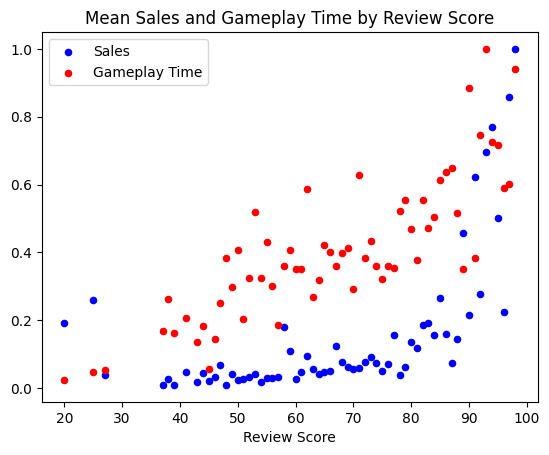

In [ ]:
review_sales_df = df.groupby('Metrics.Review Score')['Metrics.Sales'].mean().reset_index() # New data frame with mean of sales by review score
review_sales_df.rename(columns={'Metrics.Sales': 'Mean.Sales'}, inplace=True) # Renaming column to what it now represents
max_mean_sales = review_sales_df['Mean.Sales'].max()

review_sales_df['Norm.Sales'] = review_sales_df['Mean.Sales'] / max_mean_sales # Adding a column of NORMALIZED Mean Sales to help compare it to the gameplay length
review_sales_df['Metadata.Genres'] = df['Metadata.Genres']

review_length_df = df.groupby('Metrics.Review Score')['Length.All PlayStyles.Average'].mean().reset_index()
review_length_df.rename(columns={'Length.All PlayStyles.Average': 'Mean.All PlayStyles.Length'}, inplace=True)
max_mean_APS = review_length_df['Mean.All PlayStyles.Length'].max()

review_length_df['Norm.APS'] = review_length_df['Mean.All PlayStyles.Length'] / max_mean_APS 

ax = review_sales_df.plot.scatter(x='Metrics.Review Score', y='Norm.Sales', c='blue', label='Sales') # first scatter
review_length_df.plot.scatter(x='Metrics.Review Score', y='Norm.APS', c='red', label='Gameplay Time', ax=ax, xlabel='Review Score', ylabel='', title='Mean Sales and Gameplay Time by Review Score') # second scatter

<Axes: title={'center': 'Mean Sales and Main Story Time by Review Score'}, xlabel='Review Score'>

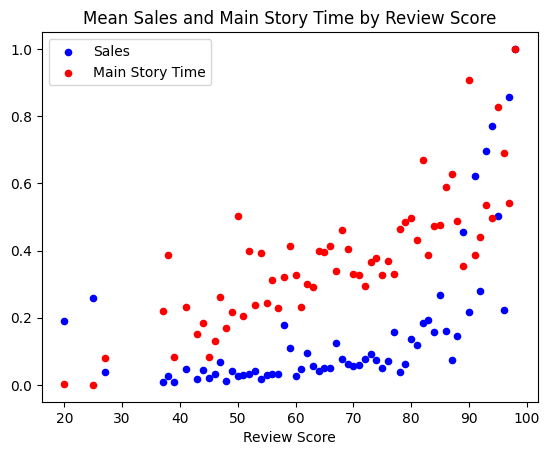

In [ ]:
review_length_df = df.groupby('Metrics.Review Score')['Length.Main Story.Average'].mean().reset_index()
review_length_df.rename(columns={'Length.Main Story.Average': 'Mean.Main Story.Length'}, inplace=True)
max_mean_MS = review_length_df['Mean.Main Story.Length'].max()

review_length_df['Norm.Main'] = review_length_df['Mean.Main Story.Length'] / max_mean_MS 

ax = review_sales_df.plot.scatter(x='Metrics.Review Score', y='Norm.Sales', c='blue', label='Sales') # first scatter
review_length_df.plot.scatter(x='Metrics.Review Score', y='Norm.Main', c='red', label='Main Story Time', ax=ax, xlabel='Review Score', ylabel='', title='Mean Sales and Main Story Time by Review Score')

<Axes: title={'center': 'Mean Sales and Main + Extras Time by Review Score'}, xlabel='Review Score'>

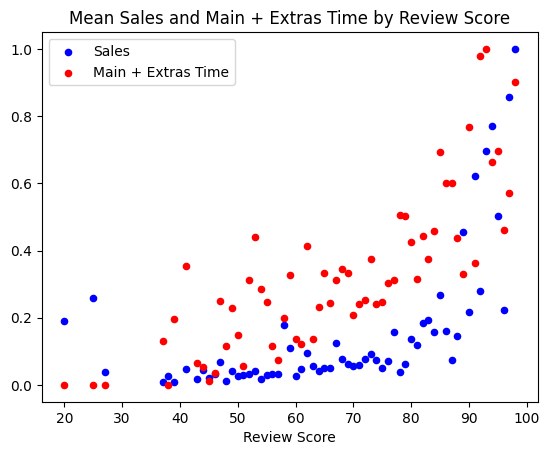

In [ ]:
review_length_df = df.groupby('Metrics.Review Score')['Length.Main + Extras.Average'].mean().reset_index()
review_length_df.rename(columns={'Length.Main + Extras.Average': 'Mean.Main + Extras.Length'}, inplace=True)
max_mean_ME = review_length_df['Mean.Main + Extras.Length'].max()

review_length_df['Norm.Main + Extras'] = review_length_df['Mean.Main + Extras.Length'] / max_mean_ME 

ax = review_sales_df.plot.scatter(x='Metrics.Review Score', y='Norm.Sales', c='blue', label='Sales') # first scatter
review_length_df.plot.scatter(x='Metrics.Review Score', y='Norm.Main + Extras', c='red', label='Main + Extras Time', ax=ax, xlabel='Review Score', ylabel='', title='Mean Sales and Main + Extras Time by Review Score')

<Axes: title={'center': 'Mean Sales and Completionists Time by Review Score'}, xlabel='Review Score'>

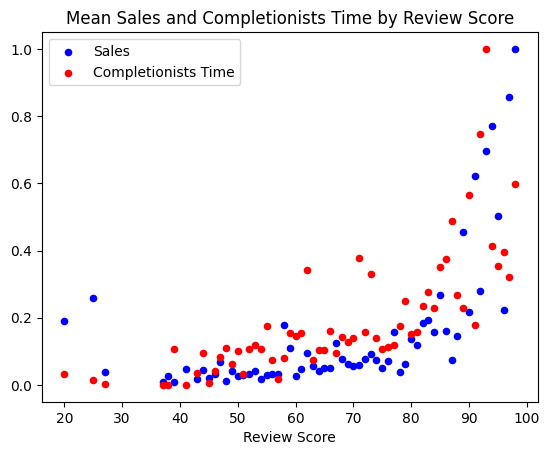

In [ ]:
review_length_df = df.groupby('Metrics.Review Score')['Length.Completionists.Average'].mean().reset_index()
review_length_df.rename(columns={'Length.Completionists.Average': 'Mean.Completionists.Length'}, inplace=True)
max_mean_C = review_length_df['Mean.Completionists.Length'].max()

review_length_df['Norm.Comp'] = review_length_df['Mean.Completionists.Length'] / max_mean_C 

ax = review_sales_df.plot.scatter(x='Metrics.Review Score', y='Norm.Sales', c='blue', label='Sales') # first scatter
review_length_df.plot.scatter(x='Metrics.Review Score', y='Norm.Comp', c='red', label='Completionists Time', ax=ax, xlabel='Review Score', ylabel='', title='Mean Sales and Completionists Time by Review Score')

**Figures 1a - 1d**


Overall, these figures suggest there is a correlation between Review Score, Gameplay Time, and Sales. We can observe that high review scoring games sell more (trivial), and are longer in general. These figures lead us to believe that games with longer completion times often have better sales. Hence, this supports the "bang for you buck" hypothesis. 

As we cycle through the playstyles, we can see that the `Time` plot slowly converges to the sales scatter plot. We have to keep in mind that these plots are normalized, so I suspect that there is at least one game (at the top) that has an overwhelmingly long `Completionists Time`. Therefore, when dividing by the max gameplay time, most of the shorter games get squished together and take the shape of the `Sales` plot. Since these figures all show positive trends regardless of which `Gameplay Time` metric used and they only differ in maximum and minimum time, we can safely say that using any of these metrics will provide equally significant results when looking for trend patterns. Thus, since it is the most average of the four, I will use `All PlayStyles` as the `Gameplay Time` variable for future analyses.

That being said, it is notable to mention that the two plots in Figure 1d take a very similar shape. It's difficult to accept this as a coincidence since the correlation between `Sales` and `Completionists Time` is too strong. The graph has some strange behavior around the `80 < Review Score < 90` domain. As such, we are led to believe that `Sales` and `Completionists Time` are directly correlated and exhibit exponential relationships with `Review Score`. 

<Axes: title={'center': 'Sales vs. All PlayStyles Average'}, xlabel='APS Average Time (hours)', ylabel='Sales'>

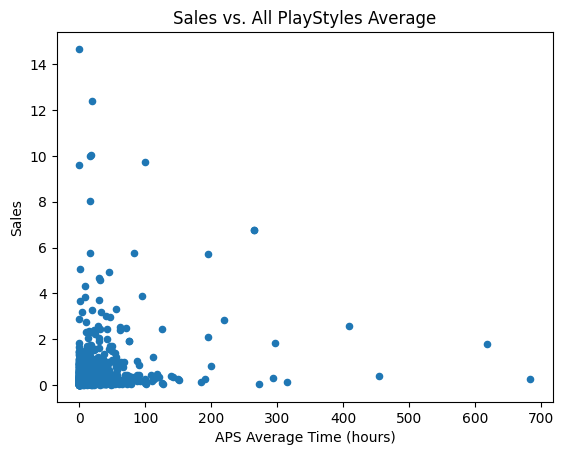

In [ ]:
df.plot.scatter(x='Length.Completionists.Average', y='Metrics.Sales', title='Sales vs. All PlayStyles Average', xlabel='APS Average Time (hours)', ylabel='Sales')

**Figure 2**

This `Sales` vs. `All PlayStyles Average` scatter plot provides an opposing arguement that `Sales` and `Gameplay Time` are indirectly related. A notable difference between this plot and the last few is that earlier figures were grouped by `Review Score`. When we ungroup by `Review Score` and directly compare `Sales` and `APS Average Time`, we get a figure that supports the "replayability" hypothesis. What exactly about grouping by `Review Score` causes this dramatic split in our data visualization? Also, how could this happen to such an obvious degree?

Earlier we saw  that `Review Score` showed a slight correlation with `Sales`. By that logic, we would assume that `Sales` and `APS Average Time` would be directly related. So, why does this figure show that there's an opposite correlation?

Depending on how you compare these three variables, we can get different results and draw completely opposite conclusions with fair certainty. I think that the analysis done in these sections was correct and, additionally, that these figures identify two types of gamers.

[Psychographic Segmentation](https://www.surveymonkey.com/market-research/resources/what-is-psychographic-segmentation/#:~:text=Psychographic%20segmentation%20is%20the%20research,interests%2C%20opinions%2C%20and%20attitudes) Hypothesis:


*  **Social**, **Multiplayer Centered Players** (Supported by Figure 2)
  *   These players like investing their money on multiplayer games where they can be social. These games are shorter (as evidenced by the figures) and promote replayability by sporting simple game features that make the games more "digestable". Since they tend to reach a bigger player base, I suspect this is why Figure 2 shows they get *more* sales.

  *   Multiplayer Centered Players care more about the overall experience of playing a game rather than the game itself. This can include who you're with, when you play, where you play, and other factors. So, much of the experience is independent from the game which makes playing "bad" games not very different from "good" games. Similar to how we actively enjoy watching bad movies, these players can play bad games with low `Review Score`. As such, `Review Score` has *no correlation* to `Sales` for these games. This is also another explaination for how games like Wii Play made a lot of money. It wasn't a particularly 'good' game with a ground breaking idea, but many people fun playing couch games with friends and family. 
  
  *   This analysis paired with the fact that data in Figures 1a-d is averaged is why we see a gentle, positive slope from 20 < `Review Score` < 80 of Figures 1a-d. 
  *   These players support the "*replayability*" idea




*  **Singleplayer "Grind" Players** (Supported by Figures 1a-d)
  *   These players like investing their money in longer games that are often single player. Such games require a lot more time to complete because of long stories with complicated lore. As such, these games are less "digestable" for the average player and are likely less popular. I suspect this is why Figure 2 shows they get *less* `Sales`. 

  *   Since these games are such a large time investment, `Review Score` is important in determining which games get played. For games with bad `Review Score`, the "Grind" Players will ignore it. Without the support of this extremely important player base, the game will fail. As such, all of the games bought and played by this player base will have high `Review Score`. When we examine game Sales, these long games that depend heavily on `Review Score` will generate *more* `Sales`. 

  *   This analysis paired with the fact that data in Figures 1a-d is averaged is why we see a steep, positive slope from `Review Score` > 80 of Figures 1a-d. Since longer games often have more complicated and interesting lore, this could be why we see this correlation between `GamePlay Time` and `Sales`. In short, long games have better reviews that weigh the average sales data when reported by review score.
  *   These players support the "*bang for their buck*" idea. As such, it's players like these who contribute to the strong correlation between completion time and sales since they seek to complete the entire game. Perhaps this is why the `Time` plot converged to the `Sales` plot in Figure 1a-d.





**Part 2: Proving the Psychographic Segmentation**

Now that we have a hypothesis for the two different playstyles, let's conduct a similar analysis as seen above and explore how the introduction of `Genre` as a new variable will impact our figures. I will start by identifying which genres are predominately singleplayer and multiplayer. By filtering the `Features.Max Players` category, we can get a better idea. One thing to note is that this category only informs the maximum available players hosted on the same individual console. In some cases, there will be games where `Features.Max Players` = 1 that have online multiplayer features.

In [ ]:
df_Multiplayer = df[df['Features.Max Players'] > 1] # Creating a database of all multiplayer games
MP_df = df_Multiplayer.value_counts('Metadata.Genres')
df_Singleplayer = df[df['Features.Max Players'] == 1] # Creating a database of all singleplayer games
SP_df = df_Singleplayer.value_counts('Metadata.Genres')
ratio = MP_df/SP_df # Taking ratio of Multiplayer games to Singleplayer games. Genres with a higher ratio will be mostly multiplayer while those will a smaller one will be mostly singleplayer
ratio

Metadata.Genres
Action                0.379630
Adventure             0.111111
Educational                NaN
Racing / Driving      0.500000
Role-Playing (RPG)    0.091667
Simulation            0.347826
Sports                1.275862
Strategy              0.238095
dtype: float64

By this ratio test, most sports games are multiplayer and most RPG's are singleplayer. This makes sense as adventure games and RPGs are meant to be an individual experience while sports are more team focused. Let's do another sales analysis and see what we get.

If our hypothesis is correct, we should find little to no `Sales` to `GamePlay Time` correlation in our Sports graph but find some remnents of a positive trend for `Sales` to `GamePlay Time` as `Review Score` increases in our RPG graph.

Perhaps when conducting a similar analysis as above by genre, we can answer the questions we asked earlier:

 

*   What exactly about grouping by `Review Score` causes this dramatic split in our data visualization?
*   Also, how could this happen to such an obvious degree?



<Axes: title={'center': 'Sports: Mean Sales and All PlayStyles Time by Review Score'}, xlabel='Review Score'>

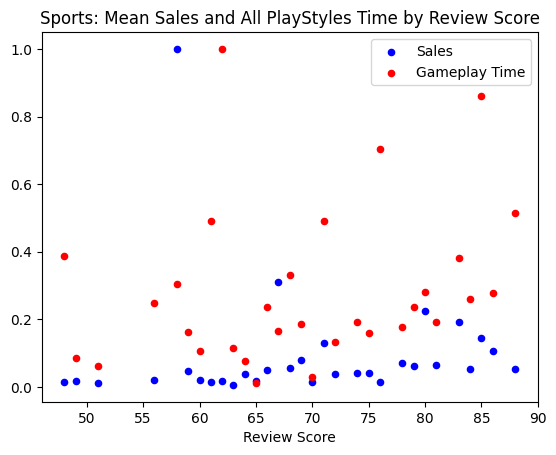

In [ ]:
Sports = df[df['Metadata.Genres'] == 'Sports']

Sports_Sales = Sports.groupby('Metrics.Review Score')['Metrics.Sales'].mean().reset_index() # Mean of sports game sales per review score
Sports_Sales.rename(columns={'Metrics.Sales': 'Mean.Sales'}, inplace=True) # Renaming column to what it now represents
max_mean_sales_Sports = Sports_Sales['Mean.Sales'].max()

Sports_Sales['Norm.Sales'] = Sports_Sales['Mean.Sales'] / max_mean_sales_Sports # Adding a column of NORMALIZED Mean Sales to help compare it to the gameplay length

Sports_length_df = Sports.groupby('Metrics.Review Score')['Length.All PlayStyles.Average'].mean().reset_index() # doing a similar thing with completionists time.
Sports_length_df.rename(columns={'Length.All PlayStyles.Average': 'Mean.All PlayStyles.Length'}, inplace=True)
max_mean_APS = Sports_length_df['Mean.All PlayStyles.Length'].max()

Sports_length_df['Norm.APS'] = Sports_length_df['Mean.All PlayStyles.Length'] / max_mean_APS 

ax = Sports_Sales.plot.scatter(x='Metrics.Review Score', y='Norm.Sales', c='blue', label='Sales') # first scatter
Sports_length_df.plot.scatter(x='Metrics.Review Score', y='Norm.APS', c='red', label='Gameplay Time', ax=ax, xlabel='Review Score', ylabel='', title='Sports: Mean Sales and All PlayStyles Time by Review Score') # second scatter

<Axes: title={'center': 'RPG: Mean Sales and All PlayStyles Time by Review Score'}, xlabel='Review Score'>

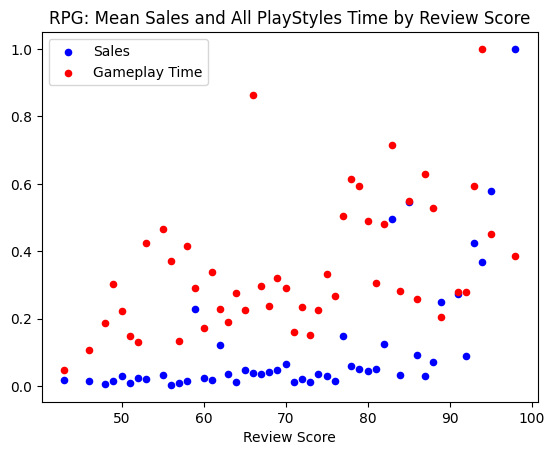

In [ ]:
RPG = df[df['Metadata.Genres'] == 'Role-Playing (RPG)']
RPG_Sales = RPG.groupby('Metrics.Review Score')['Metrics.Sales'].mean().reset_index() 
RPG_Sales.rename(columns={'Metrics.Sales': 'Mean.Sales'}, inplace=True) # Renaming column to what it now represents
max_mean_sales_RPG = RPG_Sales['Mean.Sales'].max()

RPG_Sales['Norm.Sales'] = RPG_Sales['Mean.Sales'] / max_mean_sales_RPG # Adding a column of NORMALIZED Mean Sales to help compare it to the gameplay length

RPG_length_df = RPG.groupby('Metrics.Review Score')['Length.All PlayStyles.Average'].mean().reset_index()
RPG_length_df.rename(columns={'Length.All PlayStyles.Average': 'Mean.All PlayStyles.Length'}, inplace=True)
max_mean_APS = RPG_length_df['Mean.All PlayStyles.Length'].max()

RPG_length_df['Norm.APS'] = RPG_length_df['Mean.All PlayStyles.Length'] / max_mean_APS 

ax = RPG_Sales.plot.scatter(x='Metrics.Review Score', y='Norm.Sales', c='blue', label='Sales') # first scatter
RPG_length_df.plot.scatter(x='Metrics.Review Score', y='Norm.APS', c='red', label='Gameplay Time', ax=ax, xlabel='Review Score', ylabel='', title='RPG: Mean Sales and All PlayStyles Time by Review Score') # second scatter

**Figure 3a and 3b**

As expected, our Sports graph data is much more scattered compared to our RPG graph. Thus, it is clear that `Sales` is not dependent on `Review Score` for Multiplayer Centric games. That is not the case for our Singleplayer candidate. RPG games show a slight trend. Let's do the other form of data visualization from Figure 2. We should expect RPG to occupy mostly the right and Sports to occupy mostly the left.



<Axes: title={'center': 'RPG vs. Sports'}, xlabel='Completion Time', ylabel='Sales'>

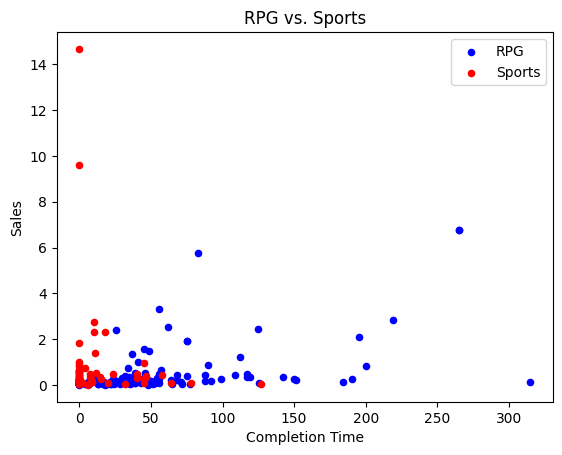

In [ ]:
RPG = df[df['Metadata.Genres'] == 'Role-Playing (RPG)']
Sports = df[df['Metadata.Genres'] == 'Sports']

ax = RPG.plot.scatter(x='Length.Completionists.Average', y='Metrics.Sales', c='blue', label='RPG') # first scatter
Sports.plot.scatter(x='Length.Completionists.Average', y='Metrics.Sales', c = 'red', label='Sports', title='RPG vs. Sports', ax=ax, xlabel='Completion Time', ylabel='Sales')

**Figure 4**

Most of the extreme left points are red while all of the extreme right points are blue. I suppose sports games have the maximum sales value because they appeal to a larger audience whose games host multiple players in the same session. 

**Conclusion**

In this project, we identified the two types of gamers. Those who seek multiplayer to have fun with friends, and those who seek singleplayer games to get lost in gameplay with intricate lore. Using this pyschographic bi-segmentation, we found two distinct and opposite game genres, Sports and RPG, whose game features serve the desires of these two player types. Through the interepretation of `GamePlay Time`, `Sales`, and `Review Score`, we managed to make a psychological diagnosis on two player bases and draw connections between how their different needs are satisfied by different `Genres`. 

Singleplayers value buying a high quality game with long gameplay times to ensure they spend their money as efficiently as posisble, only buying the best games. These players support the "bang for your buck" hypothesis. The Multiplayers value short games with multiplayer features to optimize replayability. They like shorter games because they're more simple to understand and easier to use as a tool to socialize.